## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import re

In [2]:
df = pd.read_csv('./data/data_cleaned.csv')

In [3]:
df.sample(1)

,Description,Style,Material,Finish,Assembly,Color,Product Features,Dimensions
8554,143.0_WARNING: Attention California residents:...,Transitional,wood,"Ash Finish, Wood Finish",Assembly Required,"Tan, White",shelf,31.22 In. L X 12.52 In. W X 72.01 In. H


In [4]:
df_out = pd.DataFrame()

input_columns = df.columns.tolist()
input_columns.remove("Description")
output_column = "Description"

def join_attr(row):
    return " | ".join([f"{col}: {row[col]}" for col in input_columns])

df_out["input"] = df[input_columns].apply(lambda row: join_attr(row), axis=1)
df_out["output"] = df[output_column]

df_out.head()

,input,output
0,Style: industrial | Material: wood | Finish: r...,"Expertly crafted, this console table featuring..."
1,Style: Modern & Contemporary | Material: wood ...,Add even more organization to your ample Famil...
2,Style: Modern & Contemporary | Material: wood ...,The Boyd Sleep Lugano Platform Bed Frame is a ...
3,Style: french | Material: Mahogany | Finish: H...,Introducing the Nova Bench. This bench comes f...
4,Style: Modern & Contemporary | Material: leath...,Surround your dining space with a set of dinin...


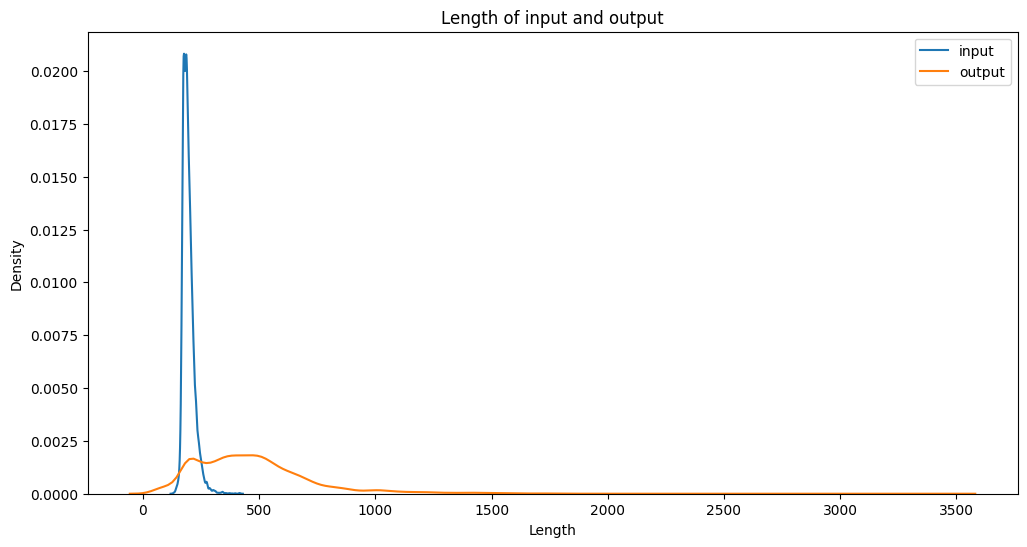

In [5]:
# show the kde of length of input and output
plt.figure(figsize=(12, 6))
sns.kdeplot(df_out["input"].apply(lambda x: len(x)), label="input")
sns.kdeplot(df_out["output"].apply(lambda x: len(x)), label="output")
plt.legend()
plt.title("Length of input and output")
plt.xlabel("Length")
plt.ylabel("Density")
plt.show()


In [6]:
input_max_length = df_out["input"].apply(lambda x: len(x)).max()
output_max_length = df_out["output"].apply(lambda x: len(x)).max()
print(f"Max length of input: {input_max_length}")
print(f"Max length of output: {output_max_length}")

Max length of input: 420
Max length of output: 3475


In [7]:
df_out[df_out["output"].apply(lambda x: len(x)) == output_max_length]

,input,output
7771,Style: rustic | Material: laminate | Finish: r...,0.0_This durable laptop desk table with power ...
7916,Style: rustic | Material: laminate | Finish: r...,1.0_This durable laptop desk table with power ...
8061,Style: rustic | Material: laminate | Finish: r...,2.0_This durable laptop desk table with power ...
8206,Style: rustic | Material: laminate | Finish: r...,3.0_This durable laptop desk table with power ...


In [8]:
df_out.to_csv("data/data_prepared.csv", index=False)